  <script type="text/javascript" src="https://ssl.gstatic.com/trends_nrtr/1280_RC06/embed_loader.js"></script>
  <script type="text/javascript">
    trends.embed.renderExploreWidget("TIMESERIES", {"comparisonItem":[{"keyword":"corticosteroids","geo":"US","time":"2015-01-01 2015-12-31"},{"keyword":"obstructive sleep apnea","geo":"US","time":"2015-01-01 2015-12-31"},{"keyword":"diabetes in","geo":"US","time":"2015-01-01 2015-12-31"},{"keyword":"glucose levels","geo":"US","time":"2015-01-01 2015-12-31"},{"keyword":"hyperglycemia","geo":"US","time":"2015-01-01 2015-12-31"}],"category":45,"property":""}, {"exploreQuery":"cat=45&date=2015-01-01%202015-12-31&geo=US&q=corticosteroids,obstructive%20sleep%20apnea,diabetes%20in,glucose%20levels,hyperglycemia","guestPath":"https://trends.google.com:443/trends/embed/"});
  </script>


  <script type="text/javascript" src="https://ssl.gstatic.com/trends_nrtr/1280_RC06/embed_loader.js"></script>
  <script type="text/javascript">
    trends.embed.renderExploreWidget("TIMESERIES", {"comparisonItem":[{"keyword":"corticosteroids","geo":"US","time":"2015-01-01 2015-12-31"},{"keyword":"obstructive sleep apnea","geo":"US","time":"2015-01-01 2015-12-31"},{"keyword":"diabetes in","geo":"US","time":"2015-01-01 2015-12-31"},{"keyword":"glucose levels","geo":"US","time":"2015-01-01 2015-12-31"},{"keyword":"hyperglycemia","geo":"US","time":"2015-01-01 2015-12-31"}],"category":45,"property":""}, {"exploreQuery":"cat=45&date=2015-01-01%202015-12-31&geo=US&q=corticosteroids,obstructive%20sleep%20apnea,diabetes%20in,glucose%20levels,hyperglycemia","guestPath":"https://trends.google.com:443/trends/embed/"});
  </script>


## Digital epidemology 2017 assignment 2

![alt text](DE_image.PNG)

### Group members: Conti Emmanuele and Rossini Valerio

Load the libraries

In [1]:
import pandas as pd
import numpy as np
    
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

import importlib
import lib as lb
importlib.reload(lb)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import random
random.seed(1610955)

The goal of this assignment is to set up a machine learning framework that predicts the prevalence of a specific chronic disease or health risk factor from digital records of online behaviour.

About the ground truth data, we have used the data from the Behavioural Risk Factor Surveillance System database of the US Center for Disease Control and Prevention. 

After that we have selected the "Chronic Health Indicators", we have chosen as chronic condition the diabete
for the years from 2004 to 2016 and different indicators (crude prevalence and age-adjusted prevalence)

About the Google Trends we have selected the following keywords (looking both google correlate https://www.google.com/trends/correlate for the the most correated words with the diabetes and "Dizionario illustrato del diabete" http://www.diabeteduemari.org/images/biblio/118_dizionario_illustrato_del.pdf): 
- Glucose
- Insulin
- HeartDisease
- Cholesterol
- Diabetes
- Type 2 diabetes
- 2 diabetes
- Hypertension
- Type 2
- Diabetes in
- Glucose levels
- Hyperglycemia
- Bloodglucose
- Corticosteroids
- Obstructive sleep apnea

Specifying the string variable 'Target', we can decide to use as target, Crude prevalence or the Age-Adjusted prevalence  

Choosing the Age-Adjusted prevalence, we have loaded the following dataframes: 
- dataframe 'df' that contains the values downloaded from google trend plus the data value downloaded from the BRFSS database. We have also decided to normalize the data.
- dataframe 'df_info' that contains information about the lower confidence interval, the upper confidence interval and the sample size of the data downloaded from BRFSS
- dataframe 'df_Pov_Inc_Ins' that contains:
    - the percentage of poverty by state (this information is taken from the "Table 21. Number of Poor and Poverty Rate, by State: 1980 to 2016" on the following site: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-poverty-people.html) 
    - the percentage of Household income less than 15000 dollars by state(this information is taken from the following site: https://nccd.cdc.gov/BRFSSPrevalence/rdPage.aspx?rdReport=DPH_BRFSS.ExploreByTopic&irbLocationType=StatesAndMMSA&islClass=CLASS03&islTopic=TOPIC18&islYear=2016&rdRnd=97729. 
    - the percentage of people covered by by Private or Government Health Insurance (this information are taken from the "Table HIB-4. Health Insurance Coverage Status and Type of Coverage by State All People: 1999 to 2012" and "Percentage of People Without Health Insurance Coverage by State: 2013 to 2016" on the following site: https://www.census.gov/data/tables/time-series/demo/health-insurance/historical-series/hib.html and https://www.census.gov/library/publications/2017/demo/p60-260.html. Then, about the table HIB-4 we have taken only the people covered by Private or Government Health Insurance. We have merged these two tables in order to have data from 2004, since the data taken from Google trend start from that year, to 2016).

We need these information because we will study the correlation of our target ground truth feature with these features.

In [2]:
Target='AgeAdjusted'
df,df_info,df_Pov_Inc_Ins,states,start_year,years,n,t=lb.datasets(Target)
t_pred=2
#%%  #1.1
# Standardize a dataset
df_scaler=(df - df.mean())/df.std()

keywords=list(df.columns[:-1])
m=len(keywords) # number of terms

df.head(5)

df_info.head(5)

df_Pov_Inc_Ins.head(5)


Glucose  Insulin  HeartDisease  Cholesterol  Diabetes  \
2016 Alabama        23.0     25.0          11.0         23.0      87.0   
     Alaska         23.0     22.0          11.0         19.0      94.0   
     Arizona        24.0     25.0          11.0         22.0      90.0   
     Arkansas       23.0     22.0          12.0         21.0      85.0   
     California     22.0     19.0          10.0         20.0      79.0   

                 Type2diabetes  2diabetes  Hypertension  Type2  Diabetesin  \
2016 Alabama              52.0       52.0          92.0   69.0        49.0   
     Alaska               53.0        0.0          85.0    0.0         0.0   
     Arizona              51.0       56.0          84.0   70.0        44.0   
     Arkansas             48.0       52.0          76.0   72.0        50.0   
     California           43.0       48.0          61.0   58.0        36.0   

                 Glucoselevels  Hyperglycemia  Bloodglucose  Corticosteroids  \
2016 Alabama              39.0           37.0          86.0             24.0   
     Alaska                0.0            0.0           0.0              0.0   
     Arizona              44.0           33.0          88.0             19.0   
     Arkansas             36.0           34.0          86.0             20.0   
     California           31.0           27.0          73.0             16.0   

                 Obstructivesleepapnea     y  
2016 Alabama                       7.0  13.2  
     Alaska                        0.0   7.7  
     Arizona                       7.0   9.7  
     Arkansas                      0.0  12.1  
     California                    5.0   9.6

Lower_CI  Upper_CI  Sample_Size
2016 Alabama         12.2      14.2         1252
     Alaska           6.3       9.2          301
     Arizona          9.0      10.5         1600
     Arkansas        10.8      13.5          993
     California       9.0      10.3         1210

PovertyPercent  IncomePercent  InsurancePercent
2016 Alabama               16.2          18.78              90.9
     Alaska                12.6          10.59              86.0
     Arizona               16.1          18.43              90.0
     Arkansas              16.0          17.59              92.1
     California            13.9          15.59              92.7

## PART 1: CORRELATION STUDY

### 1.1 - Study the correlation between the ground truth data and the Google Trends data. Explore multiple features of the ground truth data (e.g., crude prevalence, age-adjusted prevalence, etc.), and multiple keywords or entity types for querying the Google Trends data. Check for stability (or lack there of) across different years.

Here we will compute the correlation across single keyword in all the states and the BRFSS true value, by year.

The variable 'Corr_kw_by_years' contains the values of the correlation for every keyword with the true value taken from BRFSS and its dimensions are: (the total number of keywords) x (total number of years present in the range 2004-2016)

While the table 'list_kw_by_years' contains the keywords and the mean of the correlation values for every keyword sorted in increasing order.

,Keyword,Corr
0,Hyperglycemia,0.458959
1,Corticosteroids,0.438966
2,Bloodglucose,0.417829
3,Glucoselevels,0.412787
4,Hypertension,0.407355


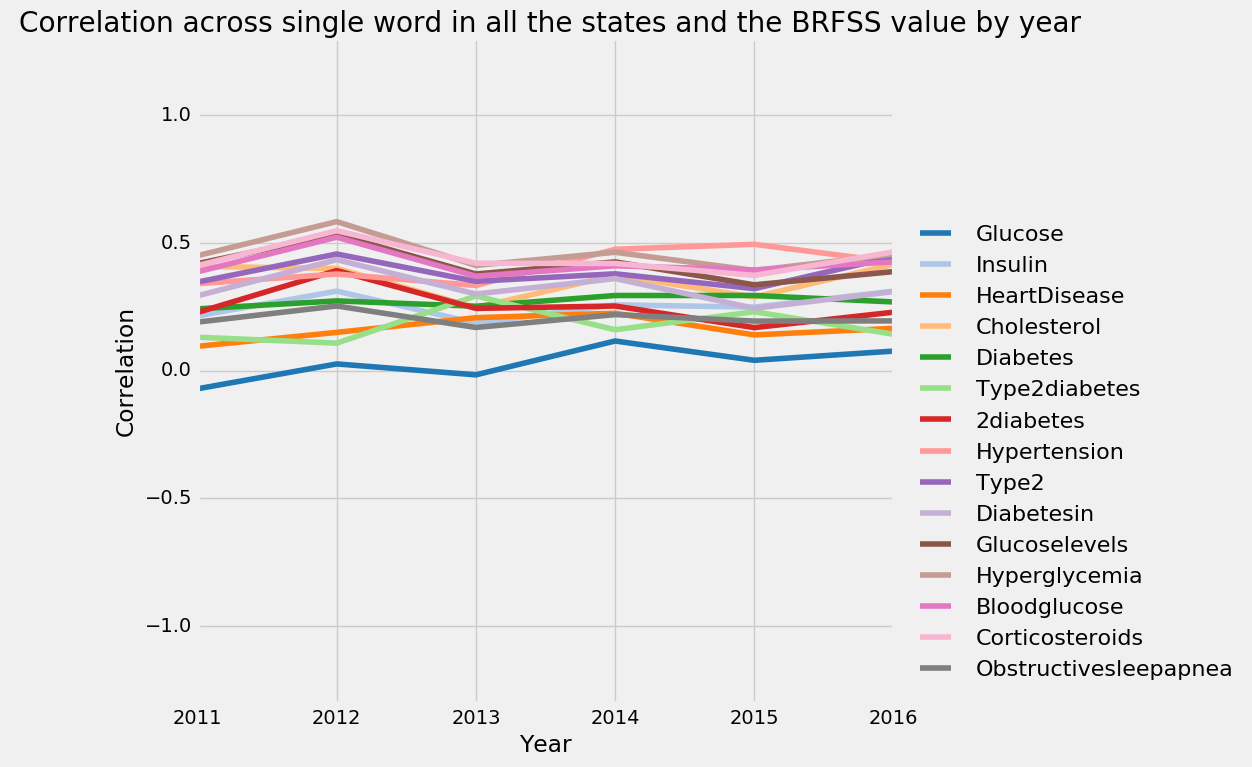

In [3]:
Corr_kw_by_years,list_kw_by_years = lb.corr_matrix_by_years(df_scaler,keywords,m,t,years,states)
list_kw_by_years.head(5)
lb.plot_stability(Corr_kw_by_years,keywords,years,m)

In this graph we can see that the overall trend of the correlations is really stable. 
All the keywords have correlation values between -0.07 and 0.583.
The most correlated keyword (calculated by mean of the years) is Hyperglicemia.

While here we will compute the correlation across values of a single keyword in all the years and the BFRSS true value by states

The variable 'Corr_st_wr' contains the values of the correlation for every keyword and its dimensions are: (total number of states) x (total number of keywords)

While the variable 'list_kw_by_states' contains keywords and mean of the correlation values for every keyword sorted in increasing order.

,Keyword,Corr
0,Glucoselevels,0.496503
1,Type2diabetes,0.493172
2,Corticosteroids,0.423133
3,Diabetes,0.302787
4,Type2,0.285469


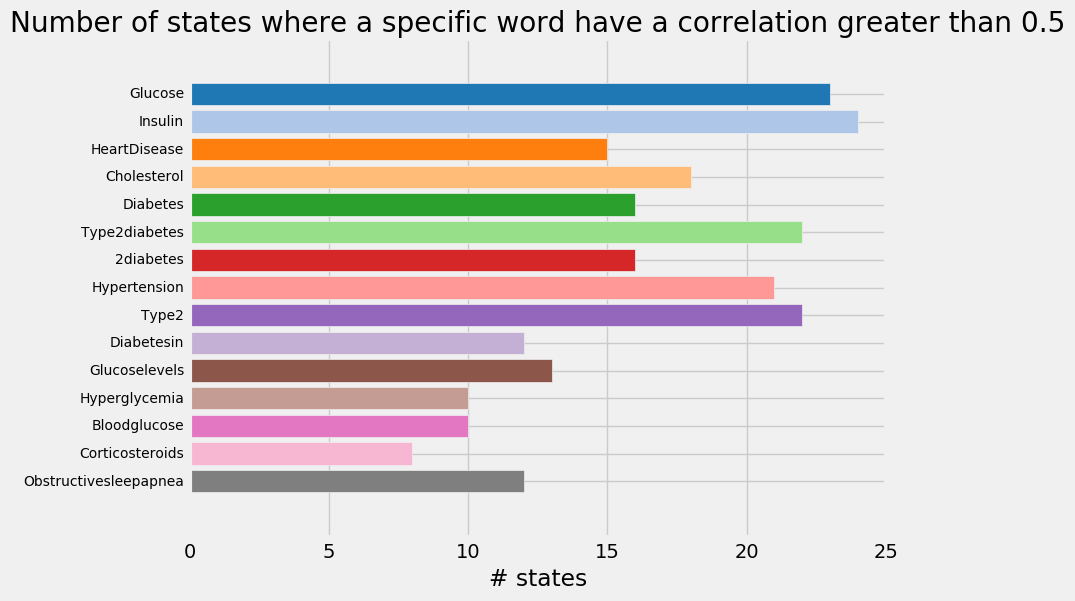

In [4]:
Covar_st_wr,list_kw_by_states = lb.corr_matrix_states_words(df_scaler,keywords,n,m,states,years)          
list_kw_by_states.head(5)
lb.plot_corr_by_states(Covar_st_wr,keywords,m,level=0.5) # Choose the threshold

In this graph we can see the number of states where a specific word have a correlation greater than a given threshold.

### 1.2 - Download US state-level data on income and poverty from the US Census Bureau. The data is available at: https://www.census.gov/data/tables/2017/demo/income-poverty/p60-259.html Study the correlation of your target ground truth feature with income/poverty features.


In this second point we do the same operations that we have done before, but considering new data: income, poverty and insurance.

In [5]:
df_with_Status=pd.merge(df, df_Pov_Inc_Ins, left_index=True, right_index=True)
df_scaler_with_Status=(df_with_Status - df_with_Status.mean() )/df_with_Status.std()

df_with_Status.head(5)

Glucose  Insulin  HeartDisease  Cholesterol  Diabetes  \
2011 Alabama        19.0     20.0          12.0         26.0      89.0   
     Alaska         15.0     15.0          10.0         21.0      82.0   
     Arizona        20.0     20.0          11.0         24.0      85.0   
     Arkansas       21.0     20.0          12.0         27.0      93.0   
     California     18.0     15.0           9.0         22.0      69.0   

                 Type2diabetes  2diabetes  Hypertension  Type2  Diabetesin  \
2011 Alabama              31.0       33.0          80.0   40.0        48.0   
     Alaska               35.0        0.0          58.0    0.0         0.0   
     Arizona              31.0       31.0          71.0   42.0        39.0   
     Arkansas             34.0       38.0          72.0   47.0        50.0   
     California           25.0       28.0          53.0   32.0        29.0   

                 Glucoselevels  Hyperglycemia  Bloodglucose  Corticosteroids  \
2011 Alabama              46.0           39.0          80.0             28.0   
     Alaska                0.0            0.0           0.0              0.0   
     Arizona              43.0           44.0          90.0             23.0   
     Arkansas             43.0           35.0          77.0             26.0   
     California           36.0           27.0          66.0             17.0   

                 Obstructivesleepapnea     y  PovertyPercent  IncomePercent  \
2011 Alabama                       6.0  10.9            15.4           18.0   
     Alaska                        0.0   8.4            11.7           14.1   
     Arizona                       5.0   9.0            17.2           15.3   
     Arkansas                      0.0  10.3            18.7           12.6   
     California                    5.0   8.5            16.9           13.0   

                 InsurancePercent  
2011 Alabama                 87.0  
     Alaska                  81.8  
     Arizona                 82.7  
     Arkansas                82.5  
     California              80.3

,Keyword,Corr
0,PovertyPercent,0.702781
1,IncomePercent,0.684725
2,Hyperglycemia,0.458959
3,Corticosteroids,0.438966
4,Bloodglucose,0.417829


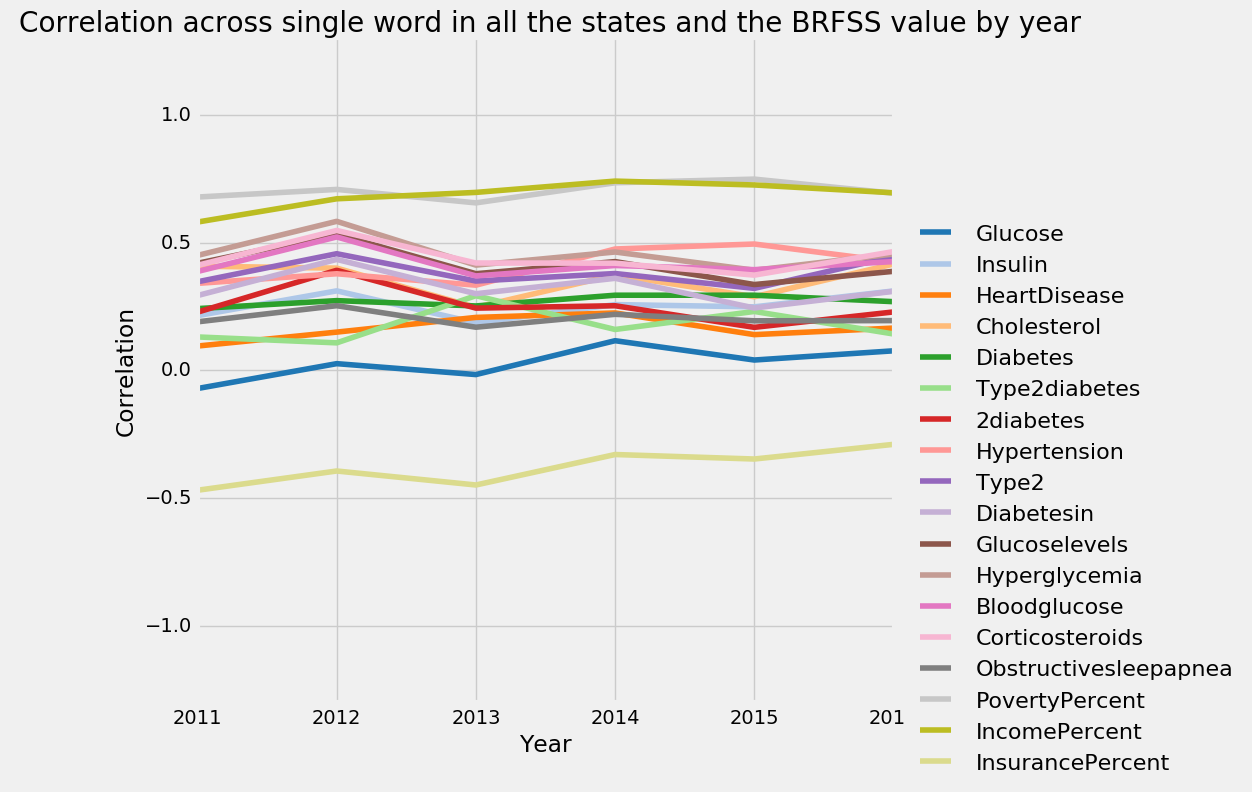

In [6]:
keywords_with_Status=list(df_with_Status.columns[df_with_Status.columns!='y'])
m_with_Status=len(keywords_with_Status) # number of terms
        
Corr_kw_by_years_with_Status,list_kw_by_years_with_Status = lb.corr_matrix_by_years(df_scaler_with_Status,keywords_with_Status,m_with_Status,t,years,states)
list_kw_by_years_with_Status.head(5)
lb.plot_stability(Corr_kw_by_years_with_Status,keywords_with_Status,years,m_with_Status)

Adding three new variables, i.e. the PovertyPercent, the IncomePercent and the InsurancePercent, we can observe correlation values greater than the previous graph where we have computed the correlation of the new variables are more marked than the others.
The negative correlation of the percentage of Insurance means that less the percentage of people are covered more the percentage of people with diabetes. 

,Keyword,Corr
0,Glucoselevels,0.460100
1,Corticosteroids,0.431096
2,Type2diabetes,0.413057
3,InsurancePercent,0.285692
4,Diabetes,0.283870


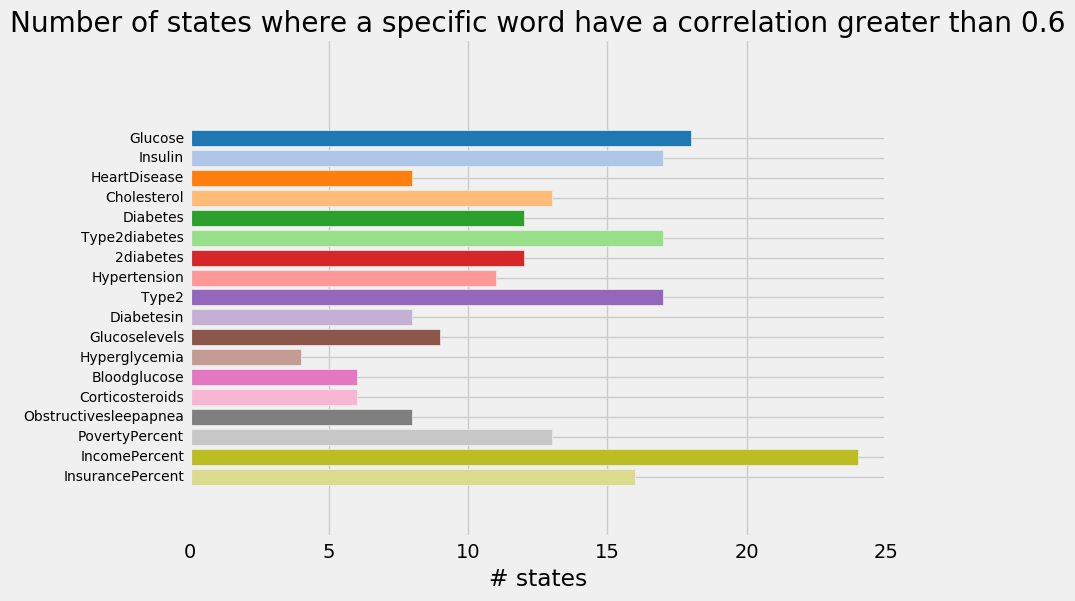

In [7]:
Covar_st_wr_with_Status,list_kw_by_states_with_Status = lb.corr_matrix_states_words(df_scaler_with_Status,keywords_with_Status,n,m_with_Status,states,years)          
list_kw_by_states_with_Status.head(5)
lb.plot_corr_by_states(Covar_st_wr_with_Status,keywords_with_Status,m_with_Status,level=0.6)

## PART 2: PREDICTION MODEL

### 2.1 - Set up a regression model that predicts your chosen ground truth indicator(s) on the basis of  Google Trends data for several keywords. Discuss the strategy you use for selecting additional keywords and for selecting which ones you include in the model. Select the model via temporal and spatial cross-validation, and discuss its generalizability across states and years on the basis of your results.

For discussing its generalizability across states and years, we have decided to fix the indeces for the training and the test regarding the prediction of the years and the state.

In [9]:
#Indexes for predict year
idx_train_years = lb.get_index(states,years[:-t_pred])
idx_test_years = lb.get_index(states,years[-t_pred:])
# Indexes for predict years
states_sampled_train = np.random.choice(states,40,replace=False).tolist()
states_sampled_test= [st for st in states if st not in states_sampled_train]

idx_train_states = lb.get_index(states_sampled_train,years)
idx_test_states = lb.get_index(states_sampled_test,years)


### Select the model via temporal cross_validation

The strategy that we have chosen for removing keywords is the partial F-test that is the most common method of testing for a nested normal linear regression model. "Nested" model is just a fancy way of saying a reduced model in terms of variables included.

In [10]:
# PREDICTION YEAR
train,test = df_scaler.loc[idx_train_years],df_scaler.loc[idx_test_years]
removed_kws = lb.feature_selection(train,test,list_kw_by_years)

RSS_full :  93.9281867855
Keywords of full model : ['Hyperglycemia', 'Corticosteroids', 'Bloodglucose', 'Glucoselevels', 'Hypertension', 'Type2', 'Cholesterol', 'Diabetesin', 'Diabetes', 'Insulin', '2diabetes', 'Obstructivesleepapnea', 'Type2diabetes', 'HeartDisease', 'Glucose']

I'm trying to remove :
 Glucose
RSS_reduced :  98.5162381263
F statistic : 14.117
The degrees of F are 1 and 290
We need to check if F is greater than 3

We have done!
The final keywords : ['Insulin', 'HeartDisease', 'Cholesterol', 'Diabetes', 'Type2diabetes', '2diabetes', 'Hypertension', 'Type2', 'Diabetesin', 'Glucoselevels', 'Hyperglycemia', 'Bloodglucose', 'Corticosteroids', 'Obstructivesleepapnea']
We removed :



For the F-test we have used the 'list_kw_by_states' that contains keywords and mean of the correlation values for every keyword sorted in increasing order. 
In a first instance we have tried to remove the less correlated keyword 'Type2diabetes'. Since the F statistic was lower than the threshold of the F test table, there wasn't a statistically significant variation between the full model and the reduced model. This means that we don't take into account for the prediction of the years. 

We removed the keywords from the dataframe and performed a grid search for obtaining the best parameters.
The grid search does a k-fold cross-validation with train and validation set without consider the test set above.

In [12]:
df_pred_years = df[df.columns[~df.columns.isin(removed_kws)]]
df_scaler_pred_years = (df_pred_years - df_pred_years.mean())/df_pred_years.std()

C_range  =  [1, 5, 10, 15, 20, 25]
gamma_range  =  [5e-4, 1e-4, 5e-3, 1e-3, 0.01, 0.1, 0.5]
list_best = lb.grid_search_CV_for_years(C_range,
                                        gamma_range,
                                        df_pred_years,
                                        df_scaler_pred_years,
                                        df_info,
                                        years[:-t_pred],
                                        states,
                                        num_kfold = 3)  

--------------Combination number 1 of 42 ------------------------
The values C   =  1  gamma  =  0.00050 
MSE  =  0.75 R2  =  0.15 and 47 (on 102) value predicted are inside the real CI)
MSE  =  0.59 R2  =  0.22 and 27 (on 51) value predicted are inside the real CI)
MSE  =  0.77 R2  =  0.23 and 24 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 2 of 42 ------------------------
The values C   =  1  gamma  =  0.00010 
MSE  =  0.91 R2  =  0.06 and 38 (on 102) value predicted are inside the real CI)
MSE  =  0.68 R2  =  0.07 and 23 (on 51) value predicted are inside the real CI)
MSE  =  0.78 R2  =  0.07 and 21 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 3 of 42 ------------------------
The values C   =  1  gamma  =  0.00500 
MSE  =  0.62 R2  =  0.38 and 51 (on 102) value predicted are inside the real CI)
MSE  =  0.51 R2  =  0.44 an

MSE  =  0.66 R2  =  0.29 and 25 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 24 of 42 ------------------------
The values C   =  15  gamma  =  0.00500 
MSE  =  0.43 R2  =  0.52 and 59 (on 102) value predicted are inside the real CI)
MSE  =  0.64 R2  =  0.62 and 27 (on 51) value predicted are inside the real CI)
MSE  =  0.48 R2  =  0.58 and 30 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 25 of 42 ------------------------
The values C   =  15  gamma  =  0.00100 
MSE  =  0.61 R2  =  0.56 and 51 (on 102) value predicted are inside the real CI)
MSE  =  0.48 R2  =  0.44 and 28 (on 51) value predicted are inside the real CI)
MSE  =  0.40 R2  =  0.45 and 27 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 26 of 42 ------------------------
The values C   = 

In [13]:
# PREDICTION YEAR
train,test = df_scaler_pred_years.loc[idx_train_years],df_scaler_pred_years.loc[idx_test_years]

x_train,y_train = train.drop(["y"],axis = 1) ,train['y']
x_test,y_test = test.drop(["y"],axis = 1) ,test['y']

regr  =  SVR(C = list_best[0],gamma = list_best[1], epsilon = 0.1,tol = 1e-6) 
# Train the model using the training sets
regr.fit(x_train,y_train)
# Make predictions using the testing set
diabetes_y_pred  =  regr.predict(x_test)
# The mean squared edf_gt_scaleror
MSE = mean_squared_error(y_test, diabetes_y_pred)
R2 = regr.score(x_train,y_train)

y_pred1 = diabetes_y_pred*df_pred_years.y.std() + df_pred_years.y.mean()
low  =  df_info.loc[idx_test_years].Lower_CI
upp  =  df_info.loc[idx_test_years].Upper_CI
n_sample = x_test.shape[0]
CI_fallen = sum((low <= y_pred1) & (y_pred1 <= upp))                          
print("MSE  =  %.2f \nR2  =  %.2f \nand %i (on %i) value predicted are inside the real CI"%(MSE,R2,CI_fallen,n_sample))


SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=1e-06, verbose=False)

MSE  =  0.83 
R2  =  0.64 
and 39 (on 102) value predicted are inside the real CI


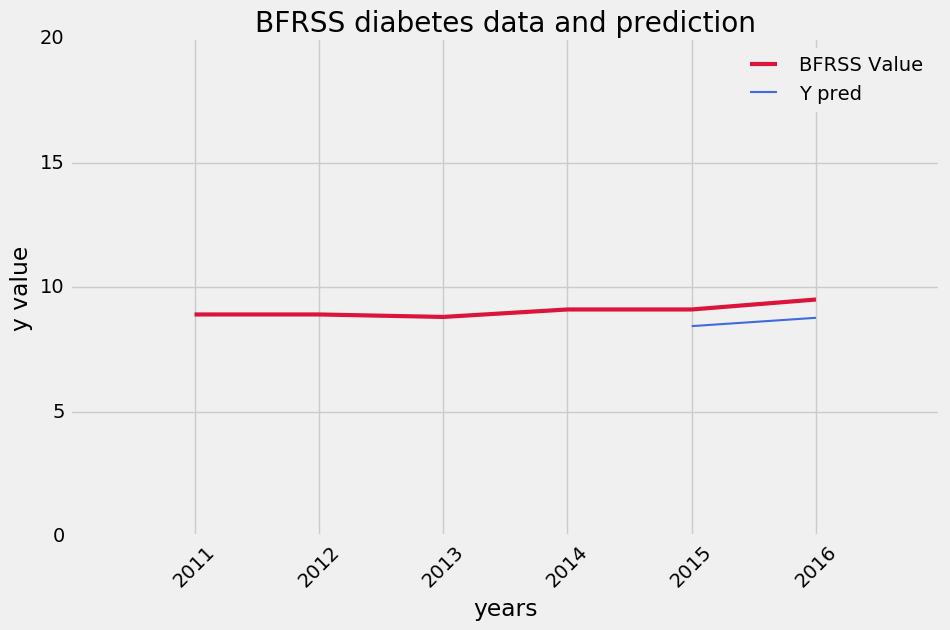

In [16]:
lb.plot_pred([y_pred1],df_pred_years,states,years,t_pred=2)

### Select the model via spatial cross_validation

In [17]:
# PREDICTION STATES
train,test = df_scaler.loc[idx_train_states],df_scaler.loc[idx_test_states]

removed_kws = lb.feature_selection(train,test,list_kw_by_years)

RSS_full :  125.749030518
Keywords of full model : ['Hyperglycemia', 'Corticosteroids', 'Bloodglucose', 'Glucoselevels', 'Hypertension', 'Type2', 'Cholesterol', 'Diabetesin', 'Diabetes', 'Insulin', '2diabetes', 'Obstructivesleepapnea', 'Type2diabetes', 'HeartDisease', 'Glucose']

I'm trying to remove :
 Glucose
RSS_reduced :  126.946988329
F statistic : 2.753
The degrees of F are 1 and 290
We need to check if F is greater than 3

I'm trying to remove :
 HeartDisease Glucose
RSS_reduced :  127.635473136
F statistic : 2.168
The degrees of F are 2 and 290
We need to check if F is greater than 2.6

I'm trying to remove :
 Type2diabetes HeartDisease Glucose
RSS_reduced :  132.265396849
F statistic : 4.992
The degrees of F are 3 and 290
We need to check if F is greater than 2.37

We have done!
The final keywords : ['Insulin', 'Cholesterol', 'Diabetes', '2diabetes', 'Hypertension', 'Type2', 'Diabetesin', 'Glucoselevels', 'Hyperglycemia', 'Bloodglucose', 'Corticosteroids', 'Obstructivesleepapn

In [18]:
df_pred_states = df[df.columns[~df.columns.isin(removed_kws)]]
df_scaler_pred_states = (df_pred_states - df_pred_states.mean())/df_pred_states.std()

list_best = lb.grid_search_for_states(C_range,
                                      gamma_range,
                                      df_pred_states,
                                      df_scaler_pred_states,
                                      df_info,
                                      years,
                                      states_sampled_train,
                                      num_kfold = 5)  

--------------Combination number 1 of 42 ------------------------
The values C   =  1  gamma  =  0.00050 
MSE  =  1.07 R2  =  0.27 and 21 (on 48) value predicted are inside the real CI)
MSE  =  0.38 R2  =  0.25 and 29 (on 48) value predicted are inside the real CI)
MSE  =  1.36 R2  =  0.28 and 16 (on 48) value predicted are inside the real CI)
MSE  =  0.74 R2  =  0.28 and 26 (on 48) value predicted are inside the real CI)
MSE  =  0.70 R2  =  0.25 and 18 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 2 of 42 ------------------------
The values C   =  1  gamma  =  0.00010 
MSE  =  0.70 R2  =  0.12 and 14 (on 48) value predicted are inside the real CI)
MSE  =  2.06 R2  =  0.09 and 15 (on 48) value predicted are inside the real CI)
MSE  =  0.87 R2  =  0.06 and 13 (on 48) value predicted are inside the real CI)
MSE  =  1.05 R2  =  0.06 and 19 (on 48) value predicted are inside the real CI)
MSE  =  0.68 R2  =  0.

MSE  =  0.48 R2  =  0.33 and 23 (on 48) value predicted are inside the real CI)
MSE  =  0.80 R2  =  0.34 and 21 (on 48) value predicted are inside the real CI)
MSE  =  1.75 R2  =  0.34 and 18 (on 48) value predicted are inside the real CI)
MSE  =  0.83 R2  =  0.36 and 17 (on 48) value predicted are inside the real CI)
MSE  =  0.33 R2  =  0.27 and 30 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 17 of 42 ------------------------
The values C   =  10  gamma  =  0.00500 
MSE  =  0.54 R2  =  0.47 and 26 (on 48) value predicted are inside the real CI)
MSE  =  0.79 R2  =  0.59 and 26 (on 48) value predicted are inside the real CI)
MSE  =  0.98 R2  =  0.65 and 12 (on 48) value predicted are inside the real CI)
MSE  =  1.70 R2  =  0.58 and 13 (on 48) value predicted are inside the real CI)
MSE  =  0.83 R2  =  0.58 and 15 (on 48) value predicted are inside the real CI)
--------------------------------------------



MSE  =  0.35 R2  =  0.57 and 25 (on 48) value predicted are inside the real CI)
MSE  =  0.99 R2  =  0.47 and 20 (on 48) value predicted are inside the real CI)
MSE  =  1.21 R2  =  0.70 and 10 (on 48) value predicted are inside the real CI)
MSE  =  1.09 R2  =  0.62 and 15 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 32 of 42 ------------------------
The values C   =  20  gamma  =  0.00100 
MSE  =  0.50 R2  =  0.51 and 29 (on 48) value predicted are inside the real CI)
MSE  =  0.69 R2  =  0.47 and 19 (on 48) value predicted are inside the real CI)
MSE  =  0.45 R2  =  0.51 and 27 (on 48) value predicted are inside the real CI)
MSE  =  0.62 R2  =  0.50 and 21 (on 48) value predicted are inside the real CI)
MSE  =  1.04 R2  =  0.55 and 21 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 33 of 42 ------------------------
The values C 

In [19]:
# PREDICTION STATES
train,test = df_scaler_pred_states.loc[idx_train_states],df_scaler_pred_states.loc[idx_test_states]

x_train,y_train = train.drop(["y"],axis = 1) ,train['y']
x_test,y_test = test.drop(["y"],axis = 1) ,test['y']

regr  =  SVR(C = list_best[0],gamma = list_best[1], epsilon = 0.1,tol = 1e-6) 
# Train the model using the training sets
regr.fit(x_train,y_train)
# Make predictions using the testing set
diabetes_y_pred  =  regr.predict(x_test)
# The mean squared edf_gt_scaleror
MSE = mean_squared_error(y_test, diabetes_y_pred)
R2 = regr.score(x_train,y_train)

y_pred4 = diabetes_y_pred*df_pred_states.y.std() + df_pred_states.y.mean()
low  =  df_info.loc[idx_test_states].Lower_CI
upp  =  df_info.loc[idx_test_states].Upper_CI
n_sample = x_test.shape[0]
CI_fallen = sum((low <= y_pred4) & (y_pred4 <= upp))                           
print("MSE  =  %.2f \nR2  =  %.2f \nand %i (on %i) value predicted are inside the real CI"%(MSE,R2,CI_fallen,n_sample))


SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=1e-06, verbose=False)

MSE  =  0.81 
R2  =  0.49 
and 27 (on 66) value predicted are inside the real CI


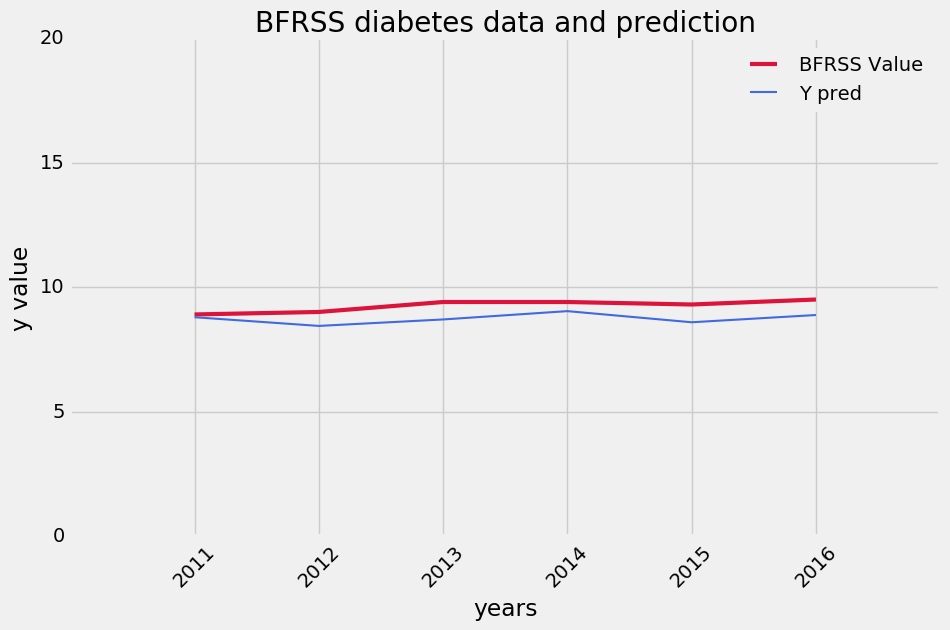

In [20]:
lb.plot_pred([y_pred4],df_pred_states,states_sampled_test,years,t_pred=0)

### 2.2 - Add to your model census features at the US state level (e.g., income data) and discuss how adding them impacts the predictive performance of the model.


### Select the model via temporal cross_validation

We wanted to study the impact on the predictive performance of new features about the status adding information about the poverty and the income. (given that we have already loaded the dataframe 'df_Pov_Inc_Ins' that contains poverty, income and insurance, we need only to remove the latter)

In [21]:
# Removing Insurance
df_with_Status_POV_INC = df_with_Status.drop(["InsurancePercent"],axis = 1)

index = list_kw_by_years_with_Status[list_kw_by_years_with_Status.Keyword=='InsurancePercent'].index
list_kw_by_years_with_Status_POV_INC = list_kw_by_years_with_Status.drop(index)

df_scaler_with_Status_POV_INC = (df_with_Status_POV_INC - df_with_Status_POV_INC.mean() )/df_with_Status_POV_INC.std()

# PREDICTION YEARS
train,test = df_scaler_with_Status_POV_INC.loc[idx_train_years],df_scaler_with_Status_POV_INC.loc[idx_test_years]
removed_kws = lb.feature_selection(train,test,list_kw_by_years_with_Status_POV_INC)

RSS_full :  42.2537196327
Keywords of full model : ['PovertyPercent', 'IncomePercent', 'Hyperglycemia', 'Corticosteroids', 'Bloodglucose', 'Glucoselevels', 'Hypertension', 'Type2', 'Cholesterol', 'Diabetesin', 'Diabetes', 'Insulin', '2diabetes', 'Obstructivesleepapnea', 'Type2diabetes', 'HeartDisease', 'Glucose']

I'm trying to remove :
 Glucose
RSS_reduced :  42.9300279831
F statistic : 4.594
The degrees of F are 1 and 288
We need to check if F is greater than 3

We have done!
The final keywords : ['Insulin', 'HeartDisease', 'Cholesterol', 'Diabetes', 'Type2diabetes', '2diabetes', 'Hypertension', 'Type2', 'Diabetesin', 'Glucoselevels', 'Hyperglycemia', 'Bloodglucose', 'Corticosteroids', 'Obstructivesleepapnea', 'PovertyPercent', 'IncomePercent']
We removed :



In [22]:
df_pred_years = df_with_Status_POV_INC[df_with_Status_POV_INC.columns[~df_with_Status_POV_INC.columns.isin(removed_kws)]]
df_scaler_pred_years = (df_pred_years - df_pred_years.mean())/df_pred_years.std()

list_best = lb.grid_search_CV_for_years(C_range,
                                      gamma_range,
                                      df_pred_years,
                                      df_scaler_pred_years,
                                      df_info,
                                      years[:-t_pred],
                                      states,
                                      num_kfold = 3)  


--------------Combination number 1 of 42 ------------------------
The values C   =  1  gamma  =  0.00050 
MSE  =  0.58 R2  =  0.31 and 53 (on 102) value predicted are inside the real CI)
MSE  =  0.50 R2  =  0.37 and 29 (on 51) value predicted are inside the real CI)
MSE  =  0.61 R2  =  0.39 and 26 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 2 of 42 ------------------------
The values C   =  1  gamma  =  0.00010 
MSE  =  0.77 R2  =  0.09 and 42 (on 102) value predicted are inside the real CI)
MSE  =  0.74 R2  =  0.11 and 21 (on 51) value predicted are inside the real CI)
MSE  =  0.85 R2  =  0.11 and 21 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 3 of 42 ------------------------
The values C   =  1  gamma  =  0.00500 
MSE  =  0.31 R2  =  0.75 and 72 (on 102) value predicted are inside the real CI)
MSE  =  0.22 R2  =  0.72 an

MSE  =  0.22 R2  =  0.78 and 39 (on 51) value predicted are inside the real CI)
MSE  =  0.25 R2  =  0.80 and 35 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 25 of 42 ------------------------
The values C   =  15  gamma  =  0.00100 
MSE  =  0.29 R2  =  0.80 and 75 (on 102) value predicted are inside the real CI)
MSE  =  0.19 R2  =  0.74 and 39 (on 51) value predicted are inside the real CI)
MSE  =  0.19 R2  =  0.75 and 38 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 26 of 42 ------------------------
The values C   =  15  gamma  =  0.01000 
MSE  =  0.47 R2  =  0.82 and 57 (on 102) value predicted are inside the real CI)
MSE  =  0.22 R2  =  0.82 and 38 (on 51) value predicted are inside the real CI)
MSE  =  0.24 R2  =  0.83 and 38 (on 51) value predicted are inside the real CI)
--------------------------------------------

----

In [23]:
# PREDICTION YEARS
train,test = df_scaler_pred_years.loc[idx_train_years],df_scaler_pred_years.loc[idx_test_years]

x_train,y_train = train.drop(["y"],axis = 1) ,train['y']
x_test,y_test = test.drop(["y"],axis = 1) ,test['y']
regr  =  SVR(C = list_best[0],gamma = list_best[1], epsilon = 0.1,tol = 1e-6) 
# Train the model using the training sets
regr.fit(x_train,y_train)
# Make predictions using the testing set
diabetes_y_pred  =  regr.predict(x_test)
# The mean squared edf_gt_scaleror
MSE = mean_squared_error(y_test, diabetes_y_pred)
R2 = regr.score(x_train,y_train)

y_pred2 = diabetes_y_pred*df_pred_years.y.std() + df_pred_years.y.mean()
low  =  df_info.loc[idx_test_years].Lower_CI
upp  =  df_info.loc[idx_test_years].Upper_CI
n_sample = x_test.shape[0]

CI_fallen = sum((low <= y_pred2) & (y_pred2 <= upp))
                               
print("MSE  =  %.2f \nR2  =  %.2f \nand %i (on %i) value predicted are inside the real CI"%(MSE,R2,CI_fallen,n_sample))


SVR(C=15, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=1e-06, verbose=False)

MSE  =  0.42 
R2  =  0.76 
and 63 (on 102) value predicted are inside the real CI


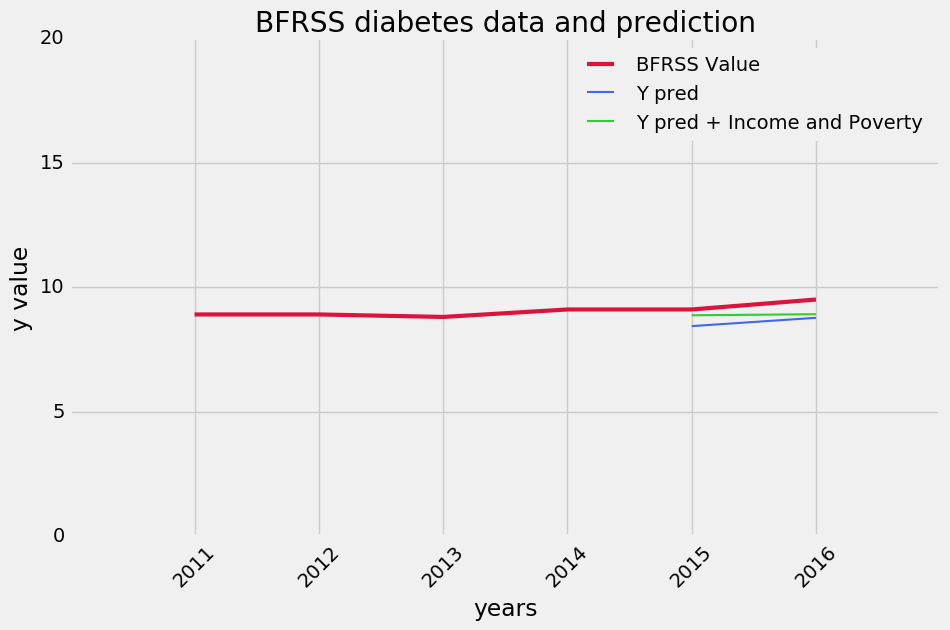

In [24]:
lb.plot_pred([y_pred1,y_pred2],df_pred_years,states,years,t_pred=t_pred)

### Select the model via spatial cross_validation

In [25]:
# feature selection
# PREDICTION states
train,test = df_scaler_with_Status_POV_INC.loc[idx_train_states],df_scaler_with_Status_POV_INC.loc[idx_test_states]
removed_kws = lb.feature_selection(train,test,list_kw_by_years_with_Status)

RSS_full :  60.999697872
Keywords of full model : ['PovertyPercent', 'IncomePercent', 'Hyperglycemia', 'Corticosteroids', 'Bloodglucose', 'Glucoselevels', 'Hypertension', 'Type2', 'InsurancePercent', 'Cholesterol', 'Diabetesin', 'Diabetes', 'Insulin', '2diabetes', 'Obstructivesleepapnea', 'Type2diabetes', 'HeartDisease', 'Glucose']

I'm trying to remove :
 Glucose
RSS_reduced :  61.3405089787
F statistic : 1.598
The degrees of F are 1 and 287
We need to check if F is greater than 3

I'm trying to remove :
 HeartDisease Glucose
RSS_reduced :  61.7215269071
F statistic : 1.692
The degrees of F are 2 and 287
We need to check if F is greater than 2.6

I'm trying to remove :
 Type2diabetes HeartDisease Glucose
RSS_reduced :  62.1459420201
F statistic : 1.791
The degrees of F are 3 and 287
We need to check if F is greater than 2.37

I'm trying to remove :
 Obstructivesleepapnea Type2diabetes HeartDisease Glucose
RSS_reduced :  62.9025423738
F statistic : 2.230
The degrees of F are 4 and 287


In [26]:
df_pred_states = df_with_Status_POV_INC[df_with_Status_POV_INC.columns[~df_with_Status_POV_INC.columns.isin(removed_kws)]]
df_scaler_pred_states = (df_pred_states - df_pred_states.mean())/df_pred_states.std()

list_best = lb.grid_search_for_states(C_range,
                                      gamma_range,
                                      df_pred_states,
                                      df_scaler_pred_states,
                                      df_info,
                                      years,
                                      states_sampled_train,
                                      num_kfold = 5) 

--------------Combination number 1 of 42 ------------------------
The values C   =  1  gamma  =  0.00050 
MSE  =  0.47 R2  =  0.38 and 27 (on 48) value predicted are inside the real CI)
MSE  =  0.75 R2  =  0.44 and 14 (on 48) value predicted are inside the real CI)
MSE  =  0.53 R2  =  0.47 and 28 (on 48) value predicted are inside the real CI)
MSE  =  0.67 R2  =  0.43 and 27 (on 48) value predicted are inside the real CI)
MSE  =  0.92 R2  =  0.47 and 21 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 2 of 42 ------------------------
The values C   =  1  gamma  =  0.00010 
MSE  =  0.99 R2  =  0.18 and 23 (on 48) value predicted are inside the real CI)
MSE  =  0.81 R2  =  0.13 and 21 (on 48) value predicted are inside the real CI)
MSE  =  1.28 R2  =  0.09 and 9 (on 48) value predicted are inside the real CI)
MSE  =  0.48 R2  =  0.14 and 25 (on 48) value predicted are inside the real CI)
MSE  =  1.23 R2  =  0.1

MSE  =  0.45 R2  =  0.57 and 28 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 17 of 42 ------------------------
The values C   =  10  gamma  =  0.00500 
MSE  =  0.30 R2  =  0.80 and 30 (on 48) value predicted are inside the real CI)
MSE  =  0.33 R2  =  0.80 and 30 (on 48) value predicted are inside the real CI)
MSE  =  0.35 R2  =  0.75 and 32 (on 48) value predicted are inside the real CI)
MSE  =  0.77 R2  =  0.79 and 21 (on 48) value predicted are inside the real CI)
MSE  =  0.68 R2  =  0.81 and 20 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 18 of 42 ------------------------
The values C   =  10  gamma  =  0.00100 
MSE  =  0.41 R2  =  0.79 and 26 (on 48) value predicted are inside the real CI)
MSE  =  0.17 R2  =  0.73 and 35 (on 48) value predicted are inside the real CI)
MSE  =  0.26 R2  =  0.69 and 34 (on 48) value predic

MSE  =  0.48 R2  =  0.85 and 29 (on 48) value predicted are inside the real CI)
MSE  =  0.38 R2  =  0.86 and 30 (on 48) value predicted are inside the real CI)
MSE  =  0.40 R2  =  0.86 and 29 (on 48) value predicted are inside the real CI)
MSE  =  1.15 R2  =  0.85 and 16 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 34 of 42 ------------------------
The values C   =  20  gamma  =  0.10000 
MSE  =  0.99 R2  =  0.98 and 32 (on 48) value predicted are inside the real CI)
MSE  =  0.42 R2  =  0.99 and 24 (on 48) value predicted are inside the real CI)
MSE  =  0.66 R2  =  0.98 and 20 (on 48) value predicted are inside the real CI)
MSE  =  0.80 R2  =  0.99 and 20 (on 48) value predicted are inside the real CI)
MSE  =  1.43 R2  =  0.98 and 13 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 35 of 42 ------------------------
The values C 

In [27]:
# PREDICTION STATES
train,test = df_scaler_pred_states.loc[idx_train_states],df_scaler_pred_states.loc[idx_test_states]

x_train,y_train = train.drop(["y"],axis = 1) ,train['y']
x_test,y_test = test.drop(["y"],axis = 1) ,test['y']
regr  =  SVR(C = list_best[0],gamma = list_best[1], epsilon = 0.1,tol = 1e-6) 
# Train the model using the training sets
regr.fit(x_train,y_train)
# Make predictions using the testing set
diabetes_y_pred  =  regr.predict(x_test)
# The mean squared edf_gt_scaleror
MSE = mean_squared_error(y_test, diabetes_y_pred)
R2 = regr.score(x_train,y_train)

y_pred5 = diabetes_y_pred*df_pred_states.y.std() + df_pred_states.y.mean()
low  =  df_info.loc[idx_test_states].Lower_CI
upp  =  df_info.loc[idx_test_states].Upper_CI
n_sample = x_test.shape[0]
CI_fallen = sum((low < y_pred5) & (y_pred5 < upp))                           
print("MSE  =  %.2f \nR2  =  %.2f \nand %i (on %i) value predicted are inside the real CI"%(MSE,R2,CI_fallen,n_sample))


SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=1e-06, verbose=False)

MSE  =  0.30 
R2  =  0.75 
and 46 (on 66) value predicted are inside the real CI


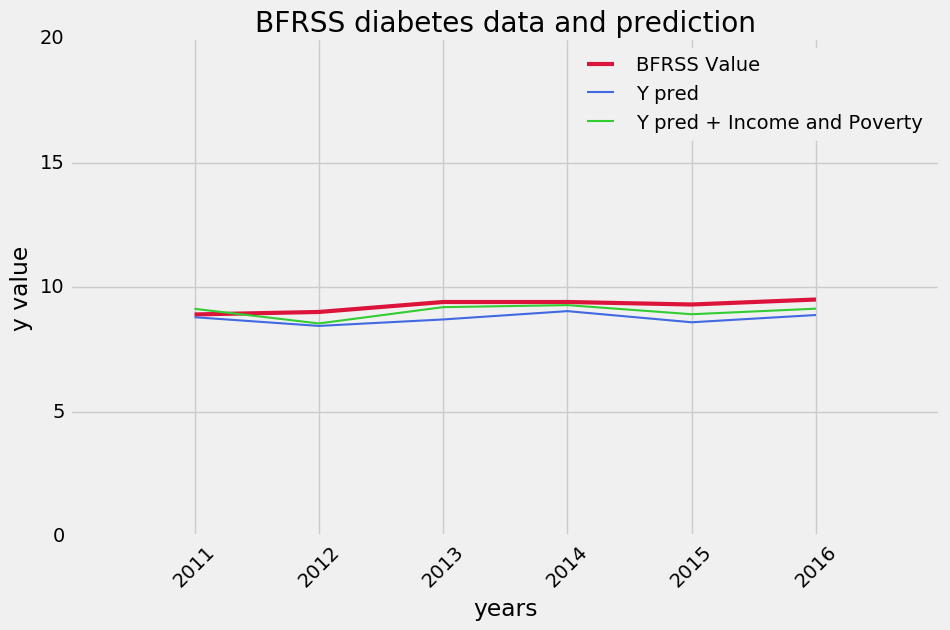

In [28]:
lb.plot_pred([y_pred4,y_pred5],df_pred_states,states_sampled_test,years,t_pred=0)

### 2.3 - Look for data on health insurance coverage  US states (any source you can find) and integrate it in your model. Repeat the above evaluation.

### Select the model via temporal cross_validation

In this last point, we wanted to study the impact on the predictive performance of new features about the status adding information about the poverty, the income and the insurance.

In [29]:
# PREDICTION YEARS
train,test = df_scaler_with_Status.loc[idx_train_years],df_scaler_with_Status.loc[idx_test_years]
removed_kws = lb.feature_selection(train,test,list_kw_by_years_with_Status)

RSS_full :  40.3251326766
Keywords of full model : ['PovertyPercent', 'IncomePercent', 'Hyperglycemia', 'Corticosteroids', 'Bloodglucose', 'Glucoselevels', 'Hypertension', 'Type2', 'InsurancePercent', 'Cholesterol', 'Diabetesin', 'Diabetes', 'Insulin', '2diabetes', 'Obstructivesleepapnea', 'Type2diabetes', 'HeartDisease', 'Glucose']

I'm trying to remove :
 Glucose
RSS_reduced :  40.5700880157
F statistic : 1.737
The degrees of F are 1 and 287
We need to check if F is greater than 3

I'm trying to remove :
 HeartDisease Glucose
RSS_reduced :  41.2875004029
F statistic : 3.413
The degrees of F are 2 and 287
We need to check if F is greater than 2.6

We have done!
The final keywords : ['Insulin', 'Cholesterol', 'Diabetes', 'Type2diabetes', '2diabetes', 'Hypertension', 'Type2', 'Diabetesin', 'Glucoselevels', 'Hyperglycemia', 'Bloodglucose', 'Corticosteroids', 'Obstructivesleepapnea', 'PovertyPercent', 'IncomePercent', 'InsurancePercent']
We removed : Glucose



In [31]:
df_pred_years = df_with_Status[df_with_Status.columns[~df_with_Status.columns.isin(removed_kws)]]
df_scaler_pred_years = (df_pred_years - df_pred_years.mean())/df_pred_years.std()

list_best = lb.grid_search_CV_for_years(C_range,
                                        gamma_range,
                                        df_pred_years,
                                        df_scaler_pred_years,
                                        df_info,
                                        years[:-t_pred],
                                        states,
                                        num_kfold = 3 )  


--------------Combination number 1 of 42 ------------------------
The values C   =  1  gamma  =  0.00050 
MSE  =  0.66 R2  =  0.32 and 50 (on 102) value predicted are inside the real CI)
MSE  =  0.47 R2  =  0.40 and 31 (on 51) value predicted are inside the real CI)
MSE  =  0.45 R2  =  0.42 and 30 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 2 of 42 ------------------------
The values C   =  1  gamma  =  0.00010 
MSE  =  0.87 R2  =  0.09 and 40 (on 102) value predicted are inside the real CI)
MSE  =  0.74 R2  =  0.12 and 22 (on 51) value predicted are inside the real CI)
MSE  =  0.64 R2  =  0.13 and 23 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 3 of 42 ------------------------
The values C   =  1  gamma  =  0.00500 
MSE  =  0.27 R2  =  0.68 and 65 (on 102) value predicted are inside the real CI)
MSE  =  0.27 R2  =  0.75 an

MSE  =  0.19 R2  =  0.80 and 38 (on 51) value predicted are inside the real CI)
MSE  =  0.17 R2  =  0.82 and 42 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 25 of 42 ------------------------
The values C   =  15  gamma  =  0.00100 
MSE  =  0.22 R2  =  0.77 and 75 (on 102) value predicted are inside the real CI)
MSE  =  0.19 R2  =  0.77 and 43 (on 51) value predicted are inside the real CI)
MSE  =  0.26 R2  =  0.78 and 36 (on 51) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 26 of 42 ------------------------
The values C   =  15  gamma  =  0.01000 
MSE  =  0.30 R2  =  0.83 and 69 (on 102) value predicted are inside the real CI)
MSE  =  0.20 R2  =  0.86 and 39 (on 51) value predicted are inside the real CI)
MSE  =  0.19 R2  =  0.85 and 37 (on 51) value predicted are inside the real CI)
--------------------------------------------

----

In [32]:
# PREDICTION YEARS
train,test = df_scaler_pred_years.loc[idx_train_years],df_scaler_pred_years.loc[idx_test_years]

x_train,y_train = train.drop(["y"],axis = 1) ,train['y']
x_test,y_test = test.drop(["y"],axis = 1) ,test['y']
regr  =  SVR(C = list_best[0],gamma = list_best[1], epsilon = 0.1,tol = 1e-6) 
# Train the model using the training sets
regr.fit(x_train,y_train)
# Make predictions using the testing set
diabetes_y_pred  =  regr.predict(x_test)
# The mean squared edf_gt_scaleror
MSE = mean_squared_error(y_test, diabetes_y_pred)
R2 = regr.score(x_train,y_train)

y_pred3 = diabetes_y_pred*df_pred_years.y.std() + df_pred_years.y.mean()
low  =  df_info.loc[idx_test_years].Lower_CI
upp  =  df_info.loc[idx_test_years].Upper_CI
n_sample = x_test.shape[0]

CI_fallen = sum((low < y_pred3) & (y_pred3 < upp))                     
print("MSE  =  %.2f \nR2  =  %.2f \nand %i (on %i) value predicted are inside the real CI"%(MSE,R2,CI_fallen,n_sample))


SVR(C=15, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
  kernel='rbf', max_iter=-1, shrinking=True, tol=1e-06, verbose=False)

MSE  =  0.47 
R2  =  0.81 
and 60 (on 102) value predicted are inside the real CI


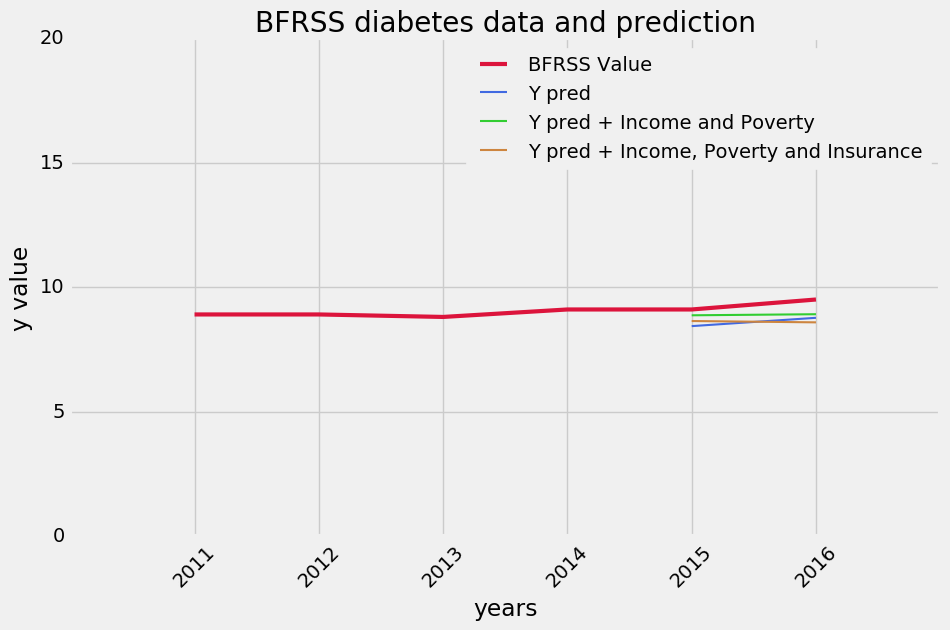

In [33]:
lb.plot_pred([y_pred1,y_pred2,y_pred3],df_pred_years,states,years,t_pred=t_pred)

In this graph we can see a comparison between different values of the predicted values respect to the real value of BFRSS, with reference to the prediction of the years.  
For showing the comparison we have performed a median among all the states for a specific year.  
We can observe from the table below that if we add poverty and income the MSE is reduced while the $R^2$ is increased. The inclusion of insurance feature doesn't improve the prediction.

<img src="table_years_AAP.png" alt="Drawing" style="width: 650px;"/>

### Select the model via spatial cross_validation

In [34]:
# feature selection
# PREDICTION states
train,test = df_scaler_with_Status.loc[idx_train_states],df_scaler_with_Status.loc[idx_test_states]
removed_kws = lb.feature_selection(train,test,list_kw_by_years_with_Status)

RSS_full :  58.2486657193
Keywords of full model : ['PovertyPercent', 'IncomePercent', 'Hyperglycemia', 'Corticosteroids', 'Bloodglucose', 'Glucoselevels', 'Hypertension', 'Type2', 'InsurancePercent', 'Cholesterol', 'Diabetesin', 'Diabetes', 'Insulin', '2diabetes', 'Obstructivesleepapnea', 'Type2diabetes', 'HeartDisease', 'Glucose']

I'm trying to remove :
 Glucose
RSS_reduced :  58.2612713741
F statistic : 0.062
The degrees of F are 1 and 287
We need to check if F is greater than 3

I'm trying to remove :
 HeartDisease Glucose
RSS_reduced :  58.4090064475
F statistic : 0.394
The degrees of F are 2 and 287
We need to check if F is greater than 2.6

I'm trying to remove :
 Type2diabetes HeartDisease Glucose
RSS_reduced :  58.7118424039
F statistic : 0.758
The degrees of F are 3 and 287
We need to check if F is greater than 2.37

I'm trying to remove :
 Obstructivesleepapnea Type2diabetes HeartDisease Glucose
RSS_reduced :  59.5914895005
F statistic : 1.648
The degrees of F are 4 and 287

In [35]:
df_pred_states = df_with_Status[df_with_Status.columns[~df_with_Status.columns.isin(removed_kws)]]
df_scaler_pred_states = (df_pred_states - df_pred_states.mean())/df_pred_states.std()

list_best = lb.grid_search_for_states(C_range,
                                      gamma_range,
                                      df_pred_states,
                                      df_scaler_pred_states,
                                      df_info,
                                      years,
                                      states_sampled_train,
                                      num_kfold = 5)  

--------------Combination number 1 of 42 ------------------------
The values C   =  1  gamma  =  0.00050 
MSE  =  0.91 R2  =  0.35 and 16 (on 48) value predicted are inside the real CI)
MSE  =  0.42 R2  =  0.50 and 27 (on 48) value predicted are inside the real CI)
MSE  =  1.01 R2  =  0.48 and 22 (on 48) value predicted are inside the real CI)
MSE  =  0.63 R2  =  0.48 and 19 (on 48) value predicted are inside the real CI)
MSE  =  0.33 R2  =  0.47 and 31 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 2 of 42 ------------------------
The values C   =  1  gamma  =  0.00010 
MSE  =  0.90 R2  =  0.14 and 11 (on 48) value predicted are inside the real CI)
MSE  =  1.00 R2  =  0.14 and 26 (on 48) value predicted are inside the real CI)
MSE  =  1.25 R2  =  0.19 and 13 (on 48) value predicted are inside the real CI)
MSE  =  0.59 R2  =  0.12 and 27 (on 48) value predicted are inside the real CI)
MSE  =  1.01 R2  =  0.

MSE  =  0.40 R2  =  0.59 and 28 (on 48) value predicted are inside the real CI)
MSE  =  0.30 R2  =  0.60 and 26 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 17 of 42 ------------------------
The values C   =  10  gamma  =  0.00500 
MSE  =  0.29 R2  =  0.84 and 37 (on 48) value predicted are inside the real CI)
MSE  =  0.32 R2  =  0.83 and 29 (on 48) value predicted are inside the real CI)
MSE  =  0.92 R2  =  0.75 and 25 (on 48) value predicted are inside the real CI)
MSE  =  0.33 R2  =  0.82 and 32 (on 48) value predicted are inside the real CI)
MSE  =  0.27 R2  =  0.81 and 37 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 18 of 42 ------------------------
The values C   =  10  gamma  =  0.00100 
MSE  =  0.67 R2  =  0.74 and 26 (on 48) value predicted are inside the real CI)
MSE  =  0.25 R2  =  0.76 and 36 (on 48) value predic

MSE  =  0.29 R2  =  0.75 and 33 (on 48) value predicted are inside the real CI)
MSE  =  0.27 R2  =  0.74 and 41 (on 48) value predicted are inside the real CI)
MSE  =  0.22 R2  =  0.78 and 38 (on 48) value predicted are inside the real CI)
MSE  =  0.46 R2  =  0.76 and 32 (on 48) value predicted are inside the real CI)
MSE  =  0.39 R2  =  0.81 and 27 (on 48) value predicted are inside the real CI)
--------------------------------------------

--------------Combination number 33 of 42 ------------------------
The values C   =  20  gamma  =  0.01000 
MSE  =  0.58 R2  =  0.88 and 27 (on 48) value predicted are inside the real CI)
MSE  =  0.78 R2  =  0.85 and 27 (on 48) value predicted are inside the real CI)
MSE  =  0.16 R2  =  0.85 and 39 (on 48) value predicted are inside the real CI)
MSE  =  0.50 R2  =  0.86 and 23 (on 48) value predicted are inside the real CI)
MSE  =  0.18 R2  =  0.86 and 37 (on 48) value predicted are inside the real CI)
--------------------------------------------



In [36]:
# PREDICTION STATES
train,test = df_scaler_pred_states.loc[idx_train_states],df_scaler_pred_states.loc[idx_test_states]

x_train,y_train = train.drop(["y"],axis = 1) ,train['y']
x_test,y_test = test.drop(["y"],axis = 1) ,test['y']
regr  =  SVR(C = list_best[0],gamma = list_best[1], epsilon = 0.1,tol = 1e-6) 
# Train the model using the training sets
regr.fit(x_train,y_train)
# Make predictions using the testing set
diabetes_y_pred  =  regr.predict(x_test)
# The mean squared edf_gt_scaleror
MSE = mean_squared_error(y_test, diabetes_y_pred)
R2 = regr.score(x_train,y_train)

y_pred6 = diabetes_y_pred*df_pred_states.y.std() + df_pred_states.y.mean()
low  =  df_info.loc[idx_test_states].Lower_CI
upp  =  df_info.loc[idx_test_states].Upper_CI
n_sample = x_test.shape[0]
CI_fallen = sum((low < y_pred6) & (y_pred6 < upp))                           
print("MSE  =  %.2f \nR2  =  %.2f \nand %i (on %i) value predicted are inside the real CI"%(MSE,R2,CI_fallen,n_sample))


SVR(C=15, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=1e-06, verbose=False)

MSE  =  0.31 
R2  =  0.76 
and 39 (on 66) value predicted are inside the real CI


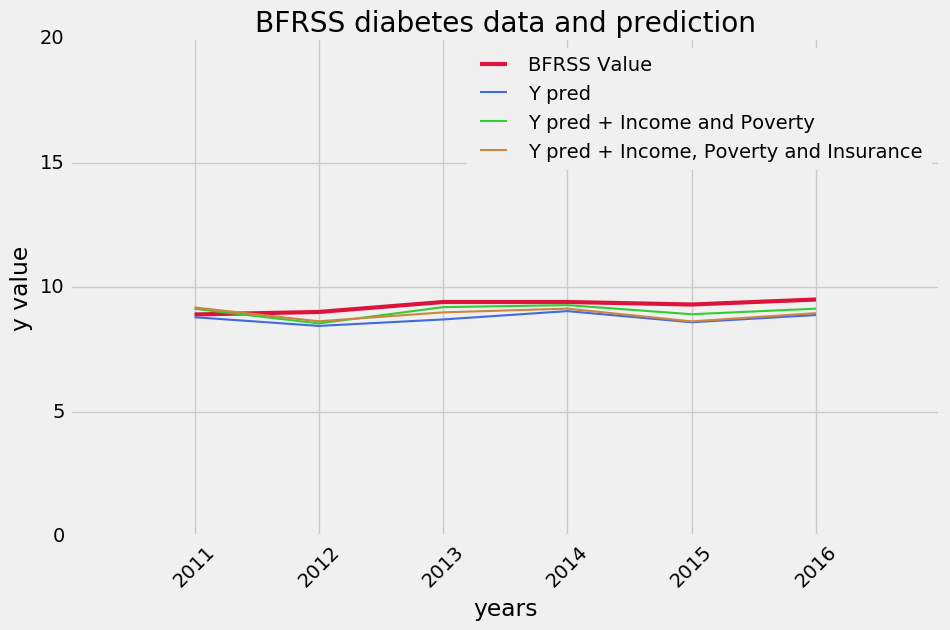

In [37]:
lb.plot_pred([y_pred4,y_pred5,y_pred6],df_pred_states,states_sampled_test,years,t_pred=0)

In this graph we can see a comparison between different values of the predicted values respect to the real value of BFRSS, with reference to the prediction of the states.  
For showing the comparison we have performed a median among the 11 states predicted for a specific year.
We can observe from the table below that if we add poverty and income the MSE is reduced by more than half while the $R^2$ is increased of 0.26. The inclusion of insurance feature doesn't improve significantly the prediction.

<img src="table_states_AAP.png" alt="Drawing" style="width: 650px;"/>